Extracted paragraphs saved: filtered_texts\3._Network-security-essentials-4th-edition-william-stallings.txt | Total Paragraphs: 2961
Extracted paragraphs saved: filtered_texts\CIS_Controls_Guide_for_SMEs_2017-1.txt | Total Paragraphs: 103
Extracted paragraphs saved: filtered_texts\Computer Security - Principles and Practice.txt | Total Paragraphs: 6925
Extracted paragraphs saved: filtered_texts\Cyber Security Essentials ( PDFDrive ).txt | Total Paragraphs: 1689
Extracted paragraphs saved: filtered_texts\getting-started-with-attack-october-2019 (1).txt | Total Paragraphs: 251
Extracted paragraphs saved: filtered_texts\getting-started-with-attack-october-2019.txt | Total Paragraphs: 251
Extracted paragraphs saved: filtered_texts\GlobalThreatReport2024.txt | Total Paragraphs: 1336
Extracted paragraphs saved: filtered_texts\ISO-IEC-27005-2022.txt | Total Paragraphs: 224
Extracted paragraphs saved: filtered_texts\KSB_statistics_2023_en.txt | Total Paragraphs: 125
Extracted paragraphs saved:

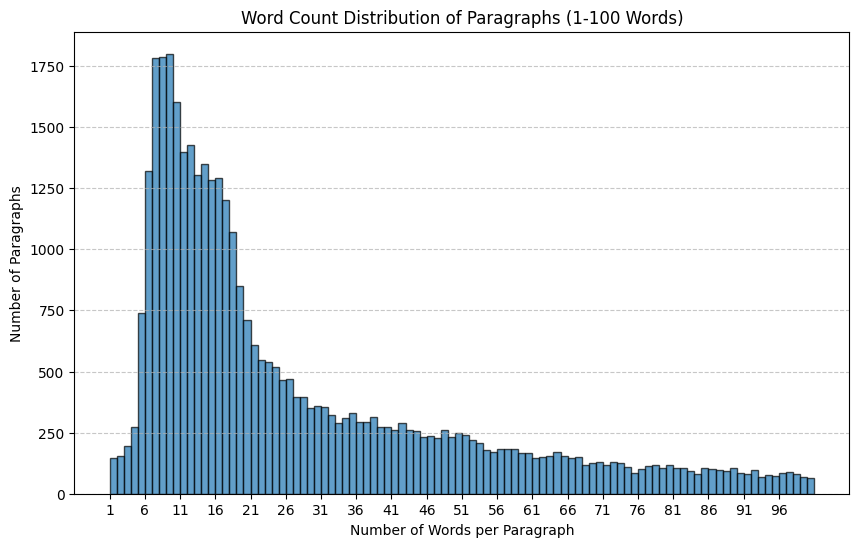

In [18]:
import os
import re
import fitz  # PyMuPDF
import matplotlib.pyplot as plt

def is_meaningful_paragraph(paragraph, min_chars=40):
    """
    Check if a paragraph is meaningful based on minimum character length.

    Args:
        paragraph (str): The paragraph to check.
        min_chars (int): Minimum number of characters to keep the paragraph.

    Returns:
        bool: True if the paragraph is meaningful, False otherwise.
    """
    paragraph = paragraph.strip()
    if len(paragraph) < min_chars:
        return False
    return True

def count_words(text):
    """
    Counts the number of words in a given text.

    Args:
        text (str): The input text.

    Returns:
        int: The word count.
    """
    return len(text.split())

def extract_meaningful_paragraphs_from_pdfs(input_folder, output_folder, min_chars=40):
    """
    Extracts meaningful paragraphs (with at least `min_chars` characters) from all PDFs in a folder,
    saves them to .txt files, and includes the word count for each paragraph.

    Args:
        input_folder (str): Path to the folder containing PDF files.
        output_folder (str): Path to the folder where text files will be saved.
        min_chars (int): Minimum number of characters per paragraph to include.

    Returns:
        list: A list of word counts for all paragraphs between 1 and 100 words.
    """
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    all_word_counts = []

    for filename in os.listdir(input_folder):
        if filename.endswith(".pdf"):
            pdf_path = os.path.join(input_folder, filename)
            output_txt_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.txt")

            pdf_document = fitz.open(pdf_path)
            meaningful_paragraphs = []

            for page_num in range(len(pdf_document)):
                page = pdf_document[page_num]
                text_blocks = page.get_text("blocks")

                for block in text_blocks:
                    _, _, _, _, text, _, _ = block
                    if is_meaningful_paragraph(text, min_chars):
                        word_count = count_words(text)
                        if 1 <= word_count <= 100:  # Restrict to 1-100 words
                            meaningful_paragraphs.append((text.strip(), word_count))
                            all_word_counts.append(word_count)

            # Save meaningful paragraphs and their word count
            with open(output_txt_path, "w", encoding="utf-8") as text_file:
                for paragraph, word_count in meaningful_paragraphs:
                    text_file.write(f"{paragraph}\n[Word Count: {word_count}]\n\n")
                text_file.write(f"Total Paragraphs: {len(meaningful_paragraphs)}")

            print(f"Extracted paragraphs saved: {output_txt_path} | Total Paragraphs: {len(meaningful_paragraphs)}")

    return all_word_counts

def plot_word_distribution(word_counts):
    """
    Plots a histogram of the word count distribution for paragraphs between 1 and 100 words.

    Args:
        word_counts (list): A list of word counts for paragraphs.
    """
    # Bins for 1 to 100 words
    bins = range(1, 102)  # Include all numbers from 1 to 100
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=bins, edgecolor="black", alpha=0.7)

    # Add titles and labels
    plt.title("Word Count Distribution of Paragraphs (1-100 Words)")
    plt.xlabel("Number of Words per Paragraph")
    plt.ylabel("Number of Paragraphs")
    plt.xticks(range(1, 101, 5))  # Show every 5th number on x-axis for readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Example usage
input_folder = "pdfs"         # Replace with your input folder path
output_folder = "filtered_texts"  # Replace with your output folder path

# Extract meaningful paragraphs and get word counts
word_counts = extract_meaningful_paragraphs_from_pdfs(input_folder, output_folder, min_chars=40)

# Plot the word count distribution
plot_word_distribution(word_counts)


In [19]:
def count_total_paragraphs(word_counts):
    """
    Count the total number of paragraphs processed.

    Args:
        word_counts (list): A list of word counts for all meaningful paragraphs.

    Returns:
        int: Total number of paragraphs.
    """
    total_paragraphs = len(word_counts)
    print(f"Total Number of Paragraphs: {total_paragraphs}")
    return total_paragraphs

# Add this line to count and print the total number of paragraphs
total_paragraphs = count_total_paragraphs(word_counts)


Total Number of Paragraphs: 38126
